In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('data/train_data.csv',index_col="調査日",parse_dates=True)
df1 = pd.read_csv('data/train_data_1mon.csv',index_col="調査日",parse_dates=True)
df2 = pd.read_csv('data/train_data_2mon.csv',index_col="調査日",parse_dates=True)
df3 = pd.read_csv('data/train_data_3mon.csv',index_col="調査日",parse_dates=True)
df = df.resample("W-MON").last()
df1 = df1.resample("W-MON").last()
df2 = df2.resample("W-MON").last()
df3 = df3.resample("W-MON").last()

In [3]:
import seaborn as sns

In [4]:
import matplotlib.pyplot as plt
import japanize_matplotlib
%matplotlib inline

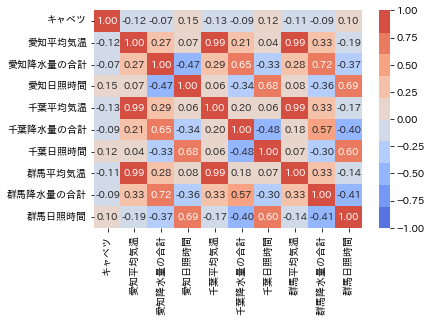

In [5]:
sns.heatmap(df.corr(), cmap= sns.color_palette('coolwarm', 10), annot=True,fmt='.2f', vmin = -1, vmax = 1)

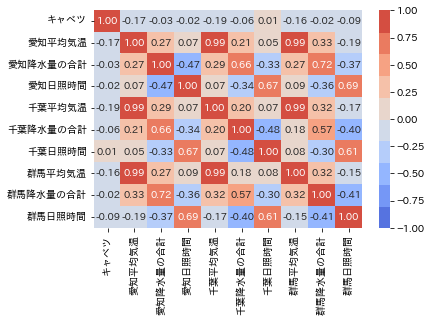

In [6]:
sns.heatmap(df1.corr(), cmap= sns.color_palette('coolwarm', 10), annot=True,fmt='.2f', vmin = -1, vmax = 1)

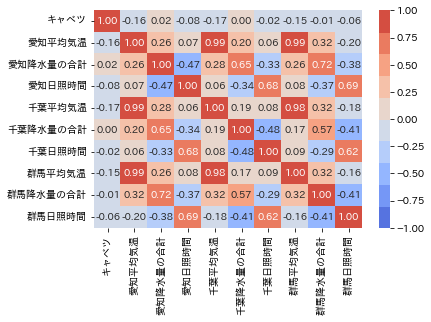

In [7]:
sns.heatmap(df2.corr(), cmap= sns.color_palette('coolwarm', 10), annot=True,fmt='.2f', vmin = -1, vmax = 1)

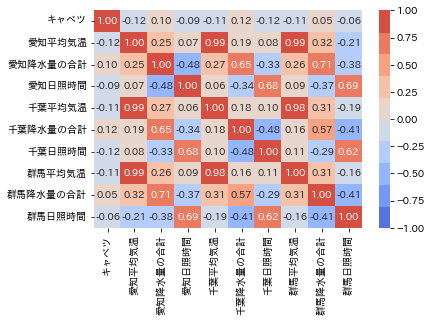

In [8]:
sns.heatmap(df3.corr(), cmap= sns.color_palette('coolwarm', 10), annot=True,fmt='.2f', vmin = -1, vmax = 1)

In [9]:
import statsmodels.api as sm 

そのままのデータで学習

In [10]:
df

,キャベツ,愛知平均気温,愛知降水量の合計,愛知日照時間,千葉平均気温,千葉降水量の合計,千葉日照時間,群馬平均気温,群馬降水量の合計,群馬日照時間
調査日,,,,,,,,,,
2017-01-02,231,8.085714,1.357143,7.357143,8.257143,0.642857,6.414286,-2.185714,2.857143,6.028571
2017-01-09,210,7.300000,3.285714,4.814286,7.942857,7.142857,5.485714,-2.957143,2.071429,4.385714
2017-01-16,197,5.157143,1.857143,4.914286,5.314286,0.000000,8.071429,-5.742857,2.642857,3.157143
2017-01-23,199,5.128571,0.000000,5.800000,6.414286,1.428571,6.500000,-6.171429,3.357143,4.728571
2017-01-30,202,5.485714,0.785714,6.785714,8.085714,0.214286,7.171429,-3.771429,0.857143,5.085714
...,...,...,...,...,...,...,...,...,...,...
2022-02-07,170,5.100000,0.000000,6.228571,5.071429,0.000000,7.828571,-6.057143,0.285714,5.585714
2022-02-14,193,5.842857,3.714286,4.285714,6.114286,12.285714,3.228571,-4.528571,3.357143,5.457143
2022-02-21,192,5.042857,2.357143,6.528571,6.328571,7.571429,5.571429,-5.585714,2.357143,2.042857


In [11]:
train = df[:-24]
test = df[-24:]

In [12]:
len(test)

24

In [13]:
test

,キャベツ,愛知平均気温,愛知降水量の合計,愛知日照時間,千葉平均気温,千葉降水量の合計,千葉日照時間,群馬平均気温,群馬降水量の合計,群馬日照時間
調査日,,,,,,,,,,
2021-09-27,220,23.414286,3.071429,5.642857,23.485714,0.000000,8.057143,14.514286,3.500000,5.228571
2021-10-04,209,23.928571,1.642857,7.771429,22.700000,22.214286,6.885714,13.985714,1.142857,4.571429
2021-10-11,187,24.114286,0.000000,5.957143,23.028571,2.500000,6.400000,15.200000,0.428571,5.585714
2021-10-18,162,21.057143,3.214286,4.857143,19.428571,5.642857,3.557143,10.957143,3.642857,4.228571
2021-10-25,145,15.514286,5.428571,4.257143,15.757143,8.214286,5.928571,4.657143,1.785714,4.200000
2021-11-01,158,16.800000,0.928571,7.571429,16.700000,10.214286,3.857143,6.085714,1.571429,6.285714
2021-11-08,168,16.842857,0.142857,6.657143,17.814286,2.071429,6.814286,6.085714,0.000000,6.428571
2021-11-15,155,14.400000,6.571429,6.842857,16.585714,3.428571,7.442857,5.414286,2.714286,6.428571
2021-11-22,141,13.971429,7.214286,4.957143,15.385714,4.714286,4.000000,4.085714,3.571429,6.171429


In [14]:
len(train)

247

In [15]:
y = train["キャベツ"]
X = train[train.columns[train.columns != "キャベツ"]]

In [16]:
y

調査日
2017-01-02    231
2017-01-09    210
2017-01-16    197
2017-01-23    199
2017-01-30    202
             ... 
2021-08-23    155
2021-08-30    161
2021-09-06    159
2021-09-13    188
2021-09-20    204
Freq: W-MON, Name: キャベツ, Length: 247, dtype: int64

In [17]:
X

,愛知平均気温,愛知降水量の合計,愛知日照時間,千葉平均気温,千葉降水量の合計,千葉日照時間,群馬平均気温,群馬降水量の合計,群馬日照時間
調査日,,,,,,,,,
2017-01-02,8.085714,1.357143,7.357143,8.257143,0.642857,6.414286,-2.185714,2.857143,6.028571
2017-01-09,7.300000,3.285714,4.814286,7.942857,7.142857,5.485714,-2.957143,2.071429,4.385714
2017-01-16,5.157143,1.857143,4.914286,5.314286,0.000000,8.071429,-5.742857,2.642857,3.157143
2017-01-23,5.128571,0.000000,5.800000,6.414286,1.428571,6.500000,-6.171429,3.357143,4.728571
2017-01-30,5.485714,0.785714,6.785714,8.085714,0.214286,7.171429,-3.771429,0.857143,5.085714
...,...,...,...,...,...,...,...,...,...
2021-08-23,25.528571,32.071429,3.100000,26.371429,0.500000,7.542857,19.571429,4.642857,2.885714
2021-08-30,29.100000,0.000000,10.114286,27.371429,0.000000,8.757143,21.514286,1.071429,6.071429
2021-09-06,25.657143,16.357143,3.771429,22.842857,24.071429,0.942857,15.285714,13.928571,1.114286


コード参考:https://www.lifull.blog/entry/2019/12/25/151030

In [22]:
import itertools

p = q = range(0, 3)
sp = sd = sq = range(0, 2)

pdq = [(x[0], 1, x[1]) for x in list(itertools.product(p, q))]
seasonal_pdq = [(x[0], x[1], x[2], 52) for x in list(itertools.product(sp, sd, sq))]

In [23]:
import warnings
warnings.filterwarnings("ignore")

best_result = [0, 0, 10000000]
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.SARIMAX(y,X, order = param, seasonal_order = param_seasonal,freq="W-MON")
            results = mod.fit()
            print('ARIMAパラメータ{}, 季節変動パラメータ{} - AIC: {}'.format(param, param_seasonal, results.aic))
            
            if results.aic < best_result[2]:
                best_result = [param, param_seasonal, results.aic]
        except:
            continue

print('AIC最小のモデル：', best_result)

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.53744D+00    |proj g|=  3.51340D-03

At iterate    5    f=  4.29207D+00    |proj g|=  4.72965D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10      9     29      1     0     0   1.176D-05   4.292D+00
  F =   4.2918680320866409     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             

 Cauchy                time 0.000E+00 seconds.
 Subspace minimization time 0.000E+00 seconds.
 Line search           time 0.000E+00

 This problem is unconstrained.



At iterate    0    f=  5.36802D+00    |proj g|=  2.11285D-03
  ys=-6.858E-01  -gs= 7.205E-01 BFGS update SKIPPED

At iterate    5    f=  3.68995D+00    |proj g|=  1.43627D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10      7     20      2     1     0   7.003D-06   3.690D+00
  F =   3.6899514873984729     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            

 Cauchy                time 0.000E+00 seconds.
 Subspace minimization time 0.000E+00 seconds.
 Line search           time 0.000E+00 seconds.

 Total User time 0.000E+00 seconds.

ARIMAパラメータ(0, 1, 0), 季節変動パラメータ(0, 1, 0, 52) - AIC: 1842.83603477484

 This problem is unconstrained.



At iterate    0    f=  3.71450D+00    |proj g|=  4.55389D-01

At iterate    5    f=  3.54868D+00    |proj g|=  1.29421D-02

At iterate   10    f=  3.53644D+00    |proj g|=  7.82365D-03

At iterate   15    f=  3.53398D+00    |proj g|=  5.01452D-03

At iterate   20    f=  3.53363D+00    |proj g|=  1.09920D-03

At iterate   25    f=  3.53356D+00    |proj g|=  5.60476D-04

At iterate   30    f=  3.53347D+00    |proj g|=  1.11185D-04

At iterate   35    f=  3.53346D+00    |proj g|=  1.24907D-04

At iterate   40    f=  3.53345D+00    |proj g|=  1.50670D-04

At iterate   45    f=  3.53345D+00    |proj g|=  1.74052D-04

At iterate   50    f=  3.53344D+00    |proj g|=  2.89275D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F   

 This problem is unconstrained.



At iterate    0    f=  4.29211D+00    |proj g|=  1.70016D-03

At iterate    5    f=  4.29187D+00    |proj g|=  6.04473D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   11      6      9      1     0     0   8.033D-06   4.292D+00
  F =   4.2918670787184672     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            

 Cauchy                time 0.000E+00 seconds.
 Subspace minimization time 0.000E+00 seconds.
 Line search           time 0.000E+00 seconds.

 Total User time 0.000E+00 seconds.

ARIMAパラメータ(0, 1, 0), 季節変動パラメータ(1, 0, 0, 52) - AIC: 2142.1823368869227
RUNNING THE L-BFGS-B CODE

           * * *

Mach

 This problem is unconstrained.



At iterate    0    f=  4.49506D+00    |proj g|=  5.90474D-01

At iterate    5    f=  4.34276D+00    |proj g|=  1.49758D-01

At iterate   10    f=  4.29212D+00    |proj g|=  1.64016D-02

At iterate   15    f=  4.29187D+00    |proj g|=  1.67895D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   12     19     22      1     0     0   7.149D-05   4.292D+00
  F =   4.2918665144729999     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             

 Cauchy                time 0.000E+00 seconds.
 Subspace minimization time 0.000E+00 seconds.
 Line search           time 0.000E+00 seconds.

 Total User time 0.000E+00 secon

 This problem is unconstrained.



At iterate    0    f=  3.59248D+00    |proj g|=  9.69292D-02

At iterate    5    f=  3.57743D+00    |proj g|=  1.12474D-02

At iterate   10    f=  3.57337D+00    |proj g|=  7.48499D-03

At iterate   15    f=  3.57258D+00    |proj g|=  1.25779D-03

At iterate   20    f=  3.57245D+00    |proj g|=  2.89515D-04

At iterate   25    f=  3.57244D+00    |proj g|=  3.50236D-04

At iterate   30    f=  3.57244D+00    |proj g|=  1.08496D-04

At iterate   35    f=  3.57244D+00    |proj g|=  2.37467D-05

At iterate   40    f=  3.57244D+00    |proj g|=  2.04533D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   11     42     45   

 This problem is unconstrained.



At iterate    0    f=  3.69891D+00    |proj g|=  8.24490D-02

At iterate    5    f=  3.55335D+00    |proj g|=  3.19777D-02

At iterate   10    f=  3.53312D+00    |proj g|=  1.22805D-02

At iterate   15    f=  3.53193D+00    |proj g|=  1.25679D-03

At iterate   20    f=  3.53123D+00    |proj g|=  3.33887D-03

At iterate   25    f=  3.53096D+00    |proj g|=  1.32295D-03

At iterate   30    f=  3.53089D+00    |proj g|=  9.40972D-04

At iterate   35    f=  3.53080D+00    |proj g|=  5.19877D-04

At iterate   40    f=  3.53074D+00    |proj g|=  1.54274D-04

At iterate   45    f=  3.53072D+00    |proj g|=  1.46901D-04

At iterate   50    f=  3.53070D+00    |proj g|=  2.10913D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F   

 This problem is unconstrained.



At iterate   25    f=  4.09378D+00    |proj g|=  1.34737D-03

At iterate   30    f=  4.09378D+00    |proj g|=  1.00054D-04

At iterate   35    f=  4.09378D+00    |proj g|=  2.98551D-05

At iterate   40    f=  4.09378D+00    |proj g|=  7.50733D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   11     40     44      1     0     0   7.507D-06   4.094D+00
  F =   4.0937753761845981     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            

 Cauchy                time 0.000E+00 seconds.
 Subspace minimization time 0.000E+00 seconds.
 Line search           time 0.000E+00 seconds.

 Total User time 0.000E+00 secon

 This problem is unconstrained.



At iterate    0    f=  4.20258D+00    |proj g|=  2.47541D-01

At iterate    5    f=  4.10060D+00    |proj g|=  1.89032D-02

At iterate   10    f=  4.09605D+00    |proj g|=  1.83372D-02

At iterate   15    f=  4.09422D+00    |proj g|=  3.70808D-03

At iterate   20    f=  4.09383D+00    |proj g|=  6.72417D-04

At iterate   25    f=  4.09378D+00    |proj g|=  1.43404D-03

At iterate   30    f=  4.09378D+00    |proj g|=  7.44820D-04

At iterate   35    f=  4.09377D+00    |proj g|=  9.58334D-05

At iterate   40    f=  4.09377D+00    |proj g|=  5.72899D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   12     44     50   

 This problem is unconstrained.



At iterate    0    f=  3.56824D+00    |proj g|=  1.20380D-01

At iterate    5    f=  3.53675D+00    |proj g|=  9.57255D-03

At iterate   10    f=  3.52461D+00    |proj g|=  6.53838D-03

At iterate   15    f=  3.52274D+00    |proj g|=  1.00762D-03

At iterate   20    f=  3.52259D+00    |proj g|=  1.12496D-03

At iterate   25    f=  3.52258D+00    |proj g|=  7.52971D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   11     29     33      1     0     0   1.178D-05   3.523D+00
  F =   3.5225745352090314     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             

 Cauchy                time 0.000E+00 seconds.
 Su

 This problem is unconstrained.



At iterate    0    f=  3.56824D+00    |proj g|=  2.95670D-01

At iterate    5    f=  3.44675D+00    |proj g|=  1.18533D-02

At iterate   10    f=  3.39250D+00    |proj g|=  1.29565D-02

At iterate   15    f=  3.38706D+00    |proj g|=  3.50634D-03

At iterate   20    f=  3.38643D+00    |proj g|=  7.10547D-03

At iterate   25    f=  3.38618D+00    |proj g|=  9.01316D-04

At iterate   30    f=  3.38608D+00    |proj g|=  7.47282D-04

At iterate   35    f=  3.38592D+00    |proj g|=  2.71312D-03

At iterate   40    f=  3.38589D+00    |proj g|=  3.33604D-04

At iterate   45    f=  3.38586D+00    |proj g|=  1.27489D-03

At iterate   50    f=  3.38584D+00    |proj g|=  1.23010D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F   

 This problem is unconstrained.



At iterate    0    f=  4.13059D+00    |proj g|=  1.49313D-01

At iterate    5    f=  4.10116D+00    |proj g|=  1.20718D-02

At iterate   10    f=  4.09613D+00    |proj g|=  1.51734D-02

At iterate   15    f=  4.09436D+00    |proj g|=  8.67527D-03

At iterate   20    f=  4.09383D+00    |proj g|=  6.95542D-04

At iterate   25    f=  4.09378D+00    |proj g|=  2.71750D-04

At iterate   30    f=  4.09378D+00    |proj g|=  2.49605D-04

At iterate   35    f=  4.09377D+00    |proj g|=  2.11768D-04

At iterate   40    f=  4.09377D+00    |proj g|=  7.41358D-05

At iterate   45    f=  4.09377D+00    |proj g|=  7.64847D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    0    f=  4.20071D+00    |proj g|=  3.50229D-01

At iterate    5    f=  4.10214D+00    |proj g|=  1.22446D-02

At iterate   10    f=  4.09712D+00    |proj g|=  2.05993D-02

At iterate   15    f=  4.09447D+00    |proj g|=  4.40128D-03

At iterate   20    f=  4.09385D+00    |proj g|=  1.12066D-03

At iterate   25    f=  4.09380D+00    |proj g|=  3.94684D-03

At iterate   30    f=  4.09378D+00    |proj g|=  6.73519D-04

At iterate   35    f=  4.09377D+00    |proj g|=  2.53275D-04

At iterate   40    f=  4.09377D+00    |proj g|=  1.20598D-04

At iterate   45    f=  4.09377D+00    |proj g|=  5.00381D-05

At iterate   50    f=  4.09377D+00    |proj g|=  1.53193D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F   

 This problem is unconstrained.



At iterate    0    f=  3.49411D+00    |proj g|=  1.18798D-01

At iterate    5    f=  3.46027D+00    |proj g|=  1.16692D-02

At iterate   10    f=  3.43455D+00    |proj g|=  3.64228D-02

At iterate   15    f=  3.42941D+00    |proj g|=  5.45793D-03

At iterate   20    f=  3.42876D+00    |proj g|=  3.38254D-04

At iterate   25    f=  3.42873D+00    |proj g|=  4.89099D-04

At iterate   30    f=  3.42872D+00    |proj g|=  4.17979D-04

At iterate   35    f=  3.42872D+00    |proj g|=  1.46545D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   12     37     41      1     0     0   1.542D-05   3.429D+00
  F =   3.42871827274

 This problem is unconstrained.



At iterate    0    f=  3.60530D+00    |proj g|=  1.35062D-01

At iterate    5    f=  3.48705D+00    |proj g|=  9.81622D-02

At iterate   10    f=  3.43899D+00    |proj g|=  2.75608D-02

At iterate   15    f=  3.41260D+00    |proj g|=  4.82272D-02

At iterate   20    f=  3.38724D+00    |proj g|=  3.21711D-03

At iterate   25    f=  3.38640D+00    |proj g|=  5.13139D-03

At iterate   30    f=  3.38552D+00    |proj g|=  1.40463D-03

At iterate   35    f=  3.38523D+00    |proj g|=  1.16505D-03

At iterate   40    f=  3.38514D+00    |proj g|=  2.18883D-03

At iterate   45    f=  3.38497D+00    |proj g|=  1.45104D-03

At iterate   50    f=  3.38489D+00    |proj g|=  6.71053D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F   

 This problem is unconstrained.



At iterate   25    f=  4.05057D+00    |proj g|=  1.92355D-03

At iterate   30    f=  4.05055D+00    |proj g|=  8.89078D-04

At iterate   35    f=  4.05055D+00    |proj g|=  4.43445D-04

At iterate   40    f=  4.05055D+00    |proj g|=  8.01412D-05

At iterate   45    f=  4.05055D+00    |proj g|=  4.20918D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   12     48     55      1     0     0   1.521D-04   4.051D+00
  F =   4.0505502297701916     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             

 Cauchy                time 0.000E+00 seconds.
 Subspace minimization time 0.000E+00 seconds.
 Line search      

 This problem is unconstrained.



At iterate    0    f=  4.15171D+00    |proj g|=  2.66694D-01

At iterate    5    f=  4.05839D+00    |proj g|=  2.26089D-02

At iterate   10    f=  4.05573D+00    |proj g|=  1.29115D-02

At iterate   15    f=  4.05081D+00    |proj g|=  7.12163D-03

At iterate   20    f=  4.05036D+00    |proj g|=  1.13317D-02

At iterate   25    f=  4.05018D+00    |proj g|=  3.40313D-03

At iterate   30    f=  4.05012D+00    |proj g|=  3.96233D-04

At iterate   35    f=  4.05011D+00    |proj g|=  3.06812D-04

At iterate   40    f=  4.05011D+00    |proj g|=  1.87825D-04

At iterate   45    f=  4.05011D+00    |proj g|=  1.01859D-04

At iterate   50    f=  4.05010D+00    |proj g|=  7.18447D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F   

 This problem is unconstrained.



At iterate    0    f=  3.52360D+00    |proj g|=  3.96470D-02

At iterate    5    f=  3.50935D+00    |proj g|=  1.02701D-02

At iterate   10    f=  3.49740D+00    |proj g|=  6.50344D-03

At iterate   15    f=  3.49402D+00    |proj g|=  3.60229D-03

At iterate   20    f=  3.49393D+00    |proj g|=  2.03041D-03

At iterate   25    f=  3.49380D+00    |proj g|=  5.46894D-04

At iterate   30    f=  3.49380D+00    |proj g|=  6.08585D-05

At iterate   35    f=  3.49380D+00    |proj g|=  7.07547D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   12     37     42      1     0     0   1.679D-05   3.494D+00
  F =   3.49379585028

 This problem is unconstrained.



At iterate    0    f=  3.52360D+00    |proj g|=  3.01827D-01

At iterate    5    f=  3.41771D+00    |proj g|=  1.20628D-02

At iterate   10    f=  3.38284D+00    |proj g|=  2.02347D-02

At iterate   15    f=  3.36096D+00    |proj g|=  5.22127D-03

At iterate   20    f=  3.35935D+00    |proj g|=  1.51902D-03

At iterate   25    f=  3.35858D+00    |proj g|=  4.05407D-03

At iterate   30    f=  3.35831D+00    |proj g|=  1.71821D-03

At iterate   35    f=  3.35824D+00    |proj g|=  1.16478D-03

At iterate   40    f=  3.35806D+00    |proj g|=  7.72809D-04

At iterate   45    f=  3.35800D+00    |proj g|=  8.77716D-04

At iterate   50    f=  3.35794D+00    |proj g|=  4.83429D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F   

 This problem is unconstrained.



At iterate    0    f=  4.07059D+00    |proj g|=  3.69244D-02

At iterate    5    f=  4.05735D+00    |proj g|=  7.07382D-03

At iterate   10    f=  4.05340D+00    |proj g|=  9.48752D-03

At iterate   15    f=  4.05092D+00    |proj g|=  3.57416D-03

At iterate   20    f=  4.05033D+00    |proj g|=  3.09436D-03

At iterate   25    f=  4.05020D+00    |proj g|=  1.66497D-03

At iterate   30    f=  4.05014D+00    |proj g|=  3.54938D-04

At iterate   35    f=  4.05013D+00    |proj g|=  2.75956D-04

At iterate   40    f=  4.05013D+00    |proj g|=  1.19032D-04

At iterate   45    f=  4.05013D+00    |proj g|=  5.41331D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    0    f=  4.14926D+00    |proj g|=  3.65541D-01

At iterate    5    f=  4.05967D+00    |proj g|=  3.97378D-02

At iterate   10    f=  4.05577D+00    |proj g|=  1.05916D-02

At iterate   15    f=  4.05108D+00    |proj g|=  7.33517D-03

At iterate   20    f=  4.05060D+00    |proj g|=  7.21139D-03

At iterate   25    f=  4.05026D+00    |proj g|=  2.20540D-03

At iterate   30    f=  4.05015D+00    |proj g|=  7.48349D-04

At iterate   35    f=  4.05013D+00    |proj g|=  3.02024D-03

At iterate   40    f=  4.05010D+00    |proj g|=  8.87315D-04

At iterate   45    f=  4.05008D+00    |proj g|=  8.96482D-04

At iterate   50    f=  4.05006D+00    |proj g|=  2.89992D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F   

 This problem is unconstrained.



At iterate    0    f=  3.44753D+00    |proj g|=  4.90013D-02

At iterate    5    f=  3.42941D+00    |proj g|=  1.20571D-02

At iterate   10    f=  3.40741D+00    |proj g|=  2.22753D-02

At iterate   15    f=  3.40115D+00    |proj g|=  8.70748D-03

At iterate   20    f=  3.40065D+00    |proj g|=  2.19156D-04

At iterate   25    f=  3.40064D+00    |proj g|=  6.28331D-04

At iterate   30    f=  3.40064D+00    |proj g|=  2.60076D-04

At iterate   35    f=  3.40064D+00    |proj g|=  4.31401D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   13     36     39      1     0     0   1.321D-04   3.401D+00
  F =   3.40063517650

 This problem is unconstrained.



At iterate    0    f=  3.55874D+00    |proj g|=  1.36409D-01

At iterate    5    f=  3.44872D+00    |proj g|=  1.02351D-01

At iterate   10    f=  3.40553D+00    |proj g|=  1.28476D-02

At iterate   15    f=  3.36680D+00    |proj g|=  2.41810D-02

At iterate   20    f=  3.35944D+00    |proj g|=  5.20423D-03

At iterate   25    f=  3.35775D+00    |proj g|=  9.46002D-03

At iterate   30    f=  3.35668D+00    |proj g|=  7.95003D-03

At iterate   35    f=  3.35638D+00    |proj g|=  3.64493D-04

At iterate   40    f=  3.35636D+00    |proj g|=  9.89564D-04

At iterate   45    f=  3.35632D+00    |proj g|=  1.62884D-03

At iterate   50    f=  3.35630D+00    |proj g|=  1.93409D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F   

 This problem is unconstrained.



At iterate   30    f=  4.08256D+00    |proj g|=  3.94446D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   11     33     35      1     0     0   1.330D-05   4.083D+00
  F =   4.0825613956800675     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             

 Cauchy                time 0.000E+00 seconds.
 Subspace minimization time 0.000E+00 seconds.
 Line search           time 0.000E+00 seconds.

 Total User time 0.000E+00 seconds.

ARIMAパラメータ(1, 1, 0), 季節変動パラメータ(0, 0, 0, 52) - AIC: 2038.7853294659535
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           12     M =           

 This problem is unconstrained.



At iterate    0    f=  4.19034D+00    |proj g|=  3.18277D-01

At iterate    5    f=  4.08626D+00    |proj g|=  1.60171D-02

At iterate   10    f=  4.08406D+00    |proj g|=  1.00755D-02

At iterate   15    f=  4.08212D+00    |proj g|=  4.21892D-03

At iterate   20    f=  4.08199D+00    |proj g|=  4.63777D-04

At iterate   25    f=  4.08194D+00    |proj g|=  2.42445D-04

At iterate   30    f=  4.08194D+00    |proj g|=  3.32058D-04

At iterate   35    f=  4.08194D+00    |proj g|=  6.15220D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   12     37     43      1     0     0   1.958D-05   4.082D+00
  F =   4.08193992354

 This problem is unconstrained.



At iterate    0    f=  3.55082D+00    |proj g|=  2.97214D-02

At iterate    5    f=  3.54368D+00    |proj g|=  4.78362D-03

At iterate   10    f=  3.53959D+00    |proj g|=  4.60994D-03

At iterate   15    f=  3.53874D+00    |proj g|=  5.55313D-04

At iterate   20    f=  3.53871D+00    |proj g|=  7.78744D-04

At iterate   25    f=  3.53870D+00    |proj g|=  3.56217D-04

At iterate   30    f=  3.53870D+00    |proj g|=  3.93403D-05

At iterate   35    f=  3.53870D+00    |proj g|=  1.73948D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   11     35     39      1     0     0   1.739D-05   3.539D+00
  F =   3.53870388898

 This problem is unconstrained.



At iterate    0    f=  3.55082D+00    |proj g|=  3.30106D-01

At iterate    5    f=  3.43970D+00    |proj g|=  1.25095D-02

At iterate   10    f=  3.38431D+00    |proj g|=  6.97117D-03

At iterate   15    f=  3.38246D+00    |proj g|=  4.45972D-03

At iterate   20    f=  3.38169D+00    |proj g|=  3.74220D-03

At iterate   25    f=  3.38125D+00    |proj g|=  1.12823D-03

At iterate   30    f=  3.38121D+00    |proj g|=  3.47373D-04

At iterate   35    f=  3.38116D+00    |proj g|=  3.59076D-04

At iterate   40    f=  3.38114D+00    |proj g|=  1.91675D-04

At iterate   45    f=  3.38113D+00    |proj g|=  1.02898D-03

At iterate   50    f=  3.38112D+00    |proj g|=  3.02909D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F   

 This problem is unconstrained.



At iterate    0    f=  4.09312D+00    |proj g|=  3.09643D-02

At iterate    5    f=  4.08528D+00    |proj g|=  5.71541D-03

At iterate   10    f=  4.08354D+00    |proj g|=  1.19971D-02

At iterate   15    f=  4.08200D+00    |proj g|=  1.07955D-03

At iterate   20    f=  4.08197D+00    |proj g|=  7.05462D-04

At iterate   25    f=  4.08194D+00    |proj g|=  4.40061D-04

At iterate   30    f=  4.08194D+00    |proj g|=  2.59406D-04

At iterate   35    f=  4.08194D+00    |proj g|=  1.20111D-04

At iterate   40    f=  4.08194D+00    |proj g|=  9.49322D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   12     42     49   

 This problem is unconstrained.



At iterate    0    f=  4.18682D+00    |proj g|=  4.20054D-01

At iterate    5    f=  4.08636D+00    |proj g|=  3.73206D-02

At iterate   10    f=  4.08441D+00    |proj g|=  7.03112D-03

At iterate   15    f=  4.08249D+00    |proj g|=  6.18079D-03

At iterate   20    f=  4.08202D+00    |proj g|=  2.18659D-03

At iterate   25    f=  4.08197D+00    |proj g|=  2.50463D-03

At iterate   30    f=  4.08194D+00    |proj g|=  5.33364D-04

At iterate   35    f=  4.08194D+00    |proj g|=  4.02838D-04

At iterate   40    f=  4.08194D+00    |proj g|=  1.57345D-04

At iterate   45    f=  4.08194D+00    |proj g|=  4.40993D-04

At iterate   50    f=  4.08194D+00    |proj g|=  1.31918D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F   

 This problem is unconstrained.



At iterate    0    f=  3.46263D+00    |proj g|=  2.61582D-02

At iterate    5    f=  3.44633D+00    |proj g|=  1.57377D-02

At iterate   10    f=  3.42216D+00    |proj g|=  3.14192D-03

At iterate   15    f=  3.42154D+00    |proj g|=  4.18496D-04

At iterate   20    f=  3.42151D+00    |proj g|=  6.83946D-04

At iterate   25    f=  3.42151D+00    |proj g|=  2.06877D-04

At iterate   30    f=  3.42151D+00    |proj g|=  2.51753D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   12     31     35      1     0     0   2.410D-05   3.422D+00
  F =   3.4215098048404085     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

 This problem is unconstrained.



At iterate    0    f=  3.56667D+00    |proj g|=  1.36980D-01

At iterate    5    f=  3.47527D+00    |proj g|=  1.28270D-01

At iterate   10    f=  3.43180D+00    |proj g|=  1.29651D-02

At iterate   15    f=  3.39133D+00    |proj g|=  2.21255D-02

At iterate   20    f=  3.37824D+00    |proj g|=  5.19794D-03

At iterate   25    f=  3.37740D+00    |proj g|=  1.34608D-03

At iterate   30    f=  3.37699D+00    |proj g|=  1.48346D-03

At iterate   35    f=  3.37695D+00    |proj g|=  2.28037D-04

At iterate   40    f=  3.37694D+00    |proj g|=  2.52931D-04

At iterate   45    f=  3.37694D+00    |proj g|=  5.16425D-04

At iterate   50    f=  3.37693D+00    |proj g|=  1.36363D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F   

 This problem is unconstrained.



At iterate   25    f=  4.05751D+00    |proj g|=  1.07278D-03

At iterate   30    f=  4.05749D+00    |proj g|=  6.92393D-04

At iterate   35    f=  4.05748D+00    |proj g|=  4.34964D-05

At iterate   40    f=  4.05748D+00    |proj g|=  3.35605D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   12     42     49      1     0     0   1.244D-05   4.057D+00
  F =   4.0574841129852164     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             

 Cauchy                time 0.000E+00 seconds.
 Subspace minimization time 0.000E+00 seconds.
 Line search           time 0.000E+00 seconds.

 Total User time 0.000E+00 secon

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           13     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.15978D+00    |proj g|=  2.80955D-01

At iterate    5    f=  4.06453D+00    |proj g|=  1.09278D-02

At iterate   10    f=  4.06120D+00    |proj g|=  1.56944D-02

At iterate   15    f=  4.05775D+00    |proj g|=  7.69803D-03

At iterate   20    f=  4.05725D+00    |proj g|=  7.25661D-04

At iterate   25    f=  4.05717D+00    |proj g|=  2.96169D-03

At iterate   30    f=  4.05715D+00    |proj g|=  2.00257D-04

At iterate   35    f=  4.05714D+00    |proj g|=  1.54950D-04

At iterate   40    f=  4.05714D+00    |proj g|=  5.42380D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg 

 This problem is unconstrained.



At iterate    0    f=  3.53268D+00    |proj g|=  4.34013D-02

At iterate    5    f=  3.51819D+00    |proj g|=  8.78962D-03

At iterate   10    f=  3.50528D+00    |proj g|=  7.10987D-03

At iterate   15    f=  3.50280D+00    |proj g|=  2.09324D-03

At iterate   20    f=  3.50266D+00    |proj g|=  3.21590D-03

At iterate   25    f=  3.50258D+00    |proj g|=  6.56768D-04

At iterate   30    f=  3.50258D+00    |proj g|=  5.37041D-05

At iterate   35    f=  3.50258D+00    |proj g|=  2.82534D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   12     37     42      1     0     0   1.183D-05   3.503D+00
  F =   3.50257811711

 This problem is unconstrained.



At iterate    0    f=  3.53268D+00    |proj g|=  3.07148D-01

At iterate    5    f=  3.42651D+00    |proj g|=  1.23785D-02

At iterate   10    f=  3.38443D+00    |proj g|=  3.90873D-02

At iterate   15    f=  3.36678D+00    |proj g|=  1.27791D-02

At iterate   20    f=  3.36418D+00    |proj g|=  2.07166D-03

At iterate   25    f=  3.36298D+00    |proj g|=  2.32506D-03

At iterate   30    f=  3.36292D+00    |proj g|=  1.03369D-03

At iterate   35    f=  3.36273D+00    |proj g|=  1.96801D-03

At iterate   40    f=  3.36268D+00    |proj g|=  1.32599D-03

At iterate   45    f=  3.36267D+00    |proj g|=  1.10668D-03

At iterate   50    f=  3.36266D+00    |proj g|=  3.32174D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F   

 This problem is unconstrained.



At iterate    0    f=  4.07513D+00    |proj g|=  4.16270D-02

At iterate    5    f=  4.06441D+00    |proj g|=  7.76283D-03

At iterate   10    f=  4.06061D+00    |proj g|=  2.61493D-02

At iterate   15    f=  4.05810D+00    |proj g|=  4.51111D-03

At iterate   20    f=  4.05728D+00    |proj g|=  1.28350D-03

At iterate   25    f=  4.05722D+00    |proj g|=  1.17104D-03

At iterate   30    f=  4.05716D+00    |proj g|=  2.91228D-04

At iterate   35    f=  4.05716D+00    |proj g|=  3.11118D-04

At iterate   40    f=  4.05715D+00    |proj g|=  7.13579D-05

At iterate   45    f=  4.05715D+00    |proj g|=  1.09804D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    0    f=  4.15705D+00    |proj g|=  3.80946D-01

At iterate    5    f=  4.06549D+00    |proj g|=  1.96110D-02

At iterate   10    f=  4.06215D+00    |proj g|=  1.56582D-02

At iterate   15    f=  4.05820D+00    |proj g|=  6.49399D-03

At iterate   20    f=  4.05739D+00    |proj g|=  5.67910D-03

At iterate   25    f=  4.05728D+00    |proj g|=  5.30230D-03

At iterate   30    f=  4.05719D+00    |proj g|=  8.45208D-04

At iterate   35    f=  4.05718D+00    |proj g|=  1.33154D-03

At iterate   40    f=  4.05715D+00    |proj g|=  6.56746D-04

At iterate   45    f=  4.05714D+00    |proj g|=  1.86972D-03

At iterate   50    f=  4.05713D+00    |proj g|=  3.62163D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F   

 This problem is unconstrained.



At iterate    0    f=  3.45401D+00    |proj g|=  4.37709D-02

At iterate    5    f=  3.43789D+00    |proj g|=  1.16129D-02

At iterate   10    f=  3.40739D+00    |proj g|=  1.08130D-02

At iterate   15    f=  3.40500D+00    |proj g|=  3.10622D-03

At iterate   20    f=  3.40497D+00    |proj g|=  6.78381D-04

At iterate   25    f=  3.40496D+00    |proj g|=  1.23891D-04

At iterate   30    f=  3.40496D+00    |proj g|=  2.66955D-05

At iterate   35    f=  3.40496D+00    |proj g|=  8.20365D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   13     37     42      1     0     0   9.083D-06   3.405D+00
  F =   3.40495808886

 This problem is unconstrained.



At iterate    0    f=  3.56316D+00    |proj g|=  1.37102D-01

At iterate    5    f=  3.45695D+00    |proj g|=  4.97804D-02

At iterate   10    f=  3.41449D+00    |proj g|=  3.20190D-02

At iterate   15    f=  3.39139D+00    |proj g|=  7.08307D-02

At iterate   20    f=  3.36420D+00    |proj g|=  4.48078D-03

At iterate   25    f=  3.36207D+00    |proj g|=  1.93951D-02

At iterate   30    f=  3.36107D+00    |proj g|=  2.74228D-03

At iterate   35    f=  3.36087D+00    |proj g|=  4.04713D-04

At iterate   40    f=  3.36085D+00    |proj g|=  1.10001D-03

At iterate   45    f=  3.36079D+00    |proj g|=  7.69038D-04

At iterate   50    f=  3.36072D+00    |proj g|=  1.01755D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F   

 This problem is unconstrained.



At iterate   20    f=  4.04843D+00    |proj g|=  1.28401D-03

At iterate   25    f=  4.04835D+00    |proj g|=  1.18004D-03

At iterate   30    f=  4.04830D+00    |proj g|=  7.67260D-04

At iterate   35    f=  4.04829D+00    |proj g|=  3.86548D-04

At iterate   40    f=  4.04829D+00    |proj g|=  1.79477D-04

At iterate   45    f=  4.04829D+00    |proj g|=  8.02166D-05

At iterate   50    f=  4.04829D+00    |proj g|=  1.40264D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   13     50     57      1     0     0   1.403D-05   4.048D+00
  F =   4.0482867270523046     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT       

 This problem is unconstrained.



At iterate    0    f=  4.15203D+00    |proj g|=  2.77668D-01

At iterate    5    f=  4.05667D+00    |proj g|=  2.33873D-02

At iterate   10    f=  4.05392D+00    |proj g|=  9.69621D-03

At iterate   15    f=  4.04917D+00    |proj g|=  1.19760D-02

At iterate   20    f=  4.04818D+00    |proj g|=  4.41578D-03

At iterate   25    f=  4.04777D+00    |proj g|=  1.08868D-03

At iterate   30    f=  4.04769D+00    |proj g|=  2.03445D-03

At iterate   35    f=  4.04764D+00    |proj g|=  7.57564D-04

At iterate   40    f=  4.04764D+00    |proj g|=  3.15249D-04

At iterate   45    f=  4.04763D+00    |proj g|=  2.36503D-04

At iterate   50    f=  4.04763D+00    |proj g|=  9.19072D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F   

 This problem is unconstrained.



At iterate    0    f=  3.52492D+00    |proj g|=  4.09676D-02

At iterate    5    f=  3.51074D+00    |proj g|=  1.31295D-02

At iterate   10    f=  3.49780D+00    |proj g|=  7.79439D-03

At iterate   15    f=  3.49419D+00    |proj g|=  3.90389D-03

At iterate   20    f=  3.49385D+00    |proj g|=  9.77244D-04

At iterate   25    f=  3.49374D+00    |proj g|=  3.59362D-03

At iterate   30    f=  3.49371D+00    |proj g|=  8.22987D-04

At iterate   35    f=  3.49370D+00    |proj g|=  1.58513D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   13     38     40      1     0     0   1.259D-05   3.494D+00
  F =   3.49370309498

 This problem is unconstrained.



At iterate    0    f=  3.52492D+00    |proj g|=  3.08243D-01

At iterate    5    f=  3.41923D+00    |proj g|=  1.84320D-02

At iterate   10    f=  3.39700D+00    |proj g|=  1.86972D-02

At iterate   15    f=  3.36088D+00    |proj g|=  7.56028D-03

At iterate   20    f=  3.35929D+00    |proj g|=  6.47424D-03

At iterate   25    f=  3.35848D+00    |proj g|=  6.23393D-03

At iterate   30    f=  3.35797D+00    |proj g|=  9.10185D-03

At iterate   35    f=  3.35779D+00    |proj g|=  1.93552D-03

At iterate   40    f=  3.35772D+00    |proj g|=  1.60908D-03

At iterate   45    f=  3.35762D+00    |proj g|=  1.30526D-03

At iterate   50    f=  3.35750D+00    |proj g|=  7.40043D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F   

 This problem is unconstrained.



At iterate    0    f=  4.06725D+00    |proj g|=  3.52162D-02

At iterate    5    f=  4.05507D+00    |proj g|=  9.02772D-03

At iterate   10    f=  4.05075D+00    |proj g|=  8.97654D-03

At iterate   15    f=  4.04828D+00    |proj g|=  3.01303D-03

At iterate   20    f=  4.04784D+00    |proj g|=  1.69733D-03

At iterate   25    f=  4.04774D+00    |proj g|=  2.04953D-03

At iterate   30    f=  4.04768D+00    |proj g|=  6.62510D-04

At iterate   35    f=  4.04767D+00    |proj g|=  2.54885D-04

At iterate   40    f=  4.04767D+00    |proj g|=  2.52407D-04

At iterate   45    f=  4.04766D+00    |proj g|=  8.76391D-05

At iterate   50    f=  4.04766D+00    |proj g|=  6.00170D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F   

 This problem is unconstrained.



At iterate    0    f=  4.14938D+00    |proj g|=  3.77914D-01

At iterate    5    f=  4.05561D+00    |proj g|=  3.18436D-02

At iterate   10    f=  4.05358D+00    |proj g|=  1.40379D-02

At iterate   15    f=  4.04848D+00    |proj g|=  3.15757D-03

At iterate   20    f=  4.04797D+00    |proj g|=  6.94862D-03

At iterate   25    f=  4.04778D+00    |proj g|=  2.87844D-03

At iterate   30    f=  4.04767D+00    |proj g|=  5.25958D-03

At iterate   35    f=  4.04763D+00    |proj g|=  8.39029D-04

At iterate   40    f=  4.04760D+00    |proj g|=  5.65182D-04

At iterate   45    f=  4.04759D+00    |proj g|=  6.59225D-04

At iterate   50    f=  4.04758D+00    |proj g|=  3.64080D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F   

 This problem is unconstrained.



At iterate    0    f=  3.44631D+00    |proj g|=  4.78719D-02

At iterate    5    f=  3.43008D+00    |proj g|=  9.61366D-03

At iterate   10    f=  3.41136D+00    |proj g|=  2.51547D-02

At iterate   15    f=  3.40146D+00    |proj g|=  6.12501D-03

At iterate   20    f=  3.40035D+00    |proj g|=  2.87868D-04

At iterate   25    f=  3.40034D+00    |proj g|=  2.01838D-04

At iterate   30    f=  3.40034D+00    |proj g|=  2.66600D-04

At iterate   35    f=  3.40034D+00    |proj g|=  5.25248D-05

At iterate   40    f=  3.40034D+00    |proj g|=  4.18117D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   14     42     50   

 This problem is unconstrained.



At iterate    0    f=  3.55638D+00    |proj g|=  1.35785D-01

At iterate    5    f=  3.45621D+00    |proj g|=  5.53643D-02

At iterate   10    f=  3.40833D+00    |proj g|=  3.08493D-02

At iterate   15    f=  3.39373D+00    |proj g|=  1.77896D-02

At iterate   20    f=  3.36017D+00    |proj g|=  1.05071D-02

At iterate   25    f=  3.35735D+00    |proj g|=  2.61941D-03

At iterate   30    f=  3.35634D+00    |proj g|=  6.21997D-03

At iterate   35    f=  3.35612D+00    |proj g|=  5.09378D-03

At iterate   40    f=  3.35594D+00    |proj g|=  2.40629D-03

At iterate   45    f=  3.35583D+00    |proj g|=  2.87819D-03

At iterate   50    f=  3.35572D+00    |proj g|=  1.23074D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F   

 This problem is unconstrained.



At iterate   25    f=  4.04393D+00    |proj g|=  3.83899D-04

At iterate   30    f=  4.04392D+00    |proj g|=  2.74859D-04

At iterate   35    f=  4.04392D+00    |proj g|=  4.06752D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   12     36     40      1     0     0   2.783D-05   4.044D+00
  F =   4.0439203329264490     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             

 Cauchy                time 0.000E+00 seconds.
 Subspace minimization time 0.000E+00 seconds.
 Line search           time 0.000E+00 seconds.

 Total User time 0.000E+00 seconds.

ARIMAパラメータ(2, 1, 0), 季節変動パラメータ(0, 0, 0, 52) - AIC: 2021.6

 This problem is unconstrained.



At iterate    0    f=  4.14658D+00    |proj g|=  2.69091D-01

At iterate    5    f=  4.05299D+00    |proj g|=  1.72245D-02

At iterate   10    f=  4.04948D+00    |proj g|=  2.10544D-02

At iterate   15    f=  4.04432D+00    |proj g|=  3.69072D-03

At iterate   20    f=  4.04356D+00    |proj g|=  1.78088D-03

At iterate   25    f=  4.04347D+00    |proj g|=  4.77937D-03

At iterate   30    f=  4.04343D+00    |proj g|=  2.66950D-04

At iterate   35    f=  4.04343D+00    |proj g|=  1.16225D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   13     39     45      1     0     0   9.473D-05   4.043D+00
  F =   4.04342756514

 This problem is unconstrained.



At iterate    0    f=  3.52234D+00    |proj g|=  4.47861D-02

At iterate    5    f=  3.50507D+00    |proj g|=  1.95990D-02

At iterate   10    f=  3.49310D+00    |proj g|=  6.71336D-03

At iterate   15    f=  3.48942D+00    |proj g|=  9.72597D-03

At iterate   20    f=  3.48919D+00    |proj g|=  2.56201D-03

At iterate   25    f=  3.48901D+00    |proj g|=  3.70239D-04

At iterate   30    f=  3.48901D+00    |proj g|=  1.27151D-04

At iterate   35    f=  3.48901D+00    |proj g|=  3.60059D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   12     36     41      1     0     0   1.209D-05   3.489D+00
  F =   3.48900597514

 This problem is unconstrained.



At iterate    0    f=  3.52234D+00    |proj g|=  2.86984D-01

At iterate    5    f=  3.42029D+00    |proj g|=  1.23677D-02

At iterate   10    f=  3.37603D+00    |proj g|=  1.94658D-02

At iterate   15    f=  3.35978D+00    |proj g|=  5.18639D-03

At iterate   20    f=  3.35763D+00    |proj g|=  2.53763D-03

At iterate   25    f=  3.35596D+00    |proj g|=  7.83705D-04

At iterate   30    f=  3.35586D+00    |proj g|=  1.35981D-03

At iterate   35    f=  3.35575D+00    |proj g|=  2.86144D-03

At iterate   40    f=  3.35566D+00    |proj g|=  4.66573D-03

At iterate   45    f=  3.35559D+00    |proj g|=  2.05098D-03

At iterate   50    f=  3.35551D+00    |proj g|=  3.76223D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F   

 This problem is unconstrained.



At iterate    0    f=  4.06482D+00    |proj g|=  4.41442D-02

At iterate    5    f=  4.05184D+00    |proj g|=  8.10341D-03

At iterate   10    f=  4.04656D+00    |proj g|=  3.90673D-02

At iterate   15    f=  4.04396D+00    |proj g|=  6.65238D-03

At iterate   20    f=  4.04358D+00    |proj g|=  9.19113D-04

At iterate   25    f=  4.04347D+00    |proj g|=  1.97298D-03

At iterate   30    f=  4.04346D+00    |proj g|=  2.11622D-04

At iterate   35    f=  4.04346D+00    |proj g|=  2.05318D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   13     35     39      1     0     0   2.053D-05   4.043D+00
  F =   4.04345917321

 This problem is unconstrained.



At iterate    0    f=  4.14427D+00    |proj g|=  3.73185D-01

At iterate    5    f=  4.05317D+00    |proj g|=  3.12702D-02

At iterate   10    f=  4.04961D+00    |proj g|=  2.05928D-02

At iterate   15    f=  4.04463D+00    |proj g|=  5.53719D-03

At iterate   20    f=  4.04369D+00    |proj g|=  2.38418D-03

At iterate   25    f=  4.04357D+00    |proj g|=  3.86283D-03

At iterate   30    f=  4.04345D+00    |proj g|=  1.32641D-03

At iterate   35    f=  4.04342D+00    |proj g|=  2.64769D-03

At iterate   40    f=  4.04335D+00    |proj g|=  1.33968D-03

At iterate   45    f=  4.04330D+00    |proj g|=  9.18903D-04

At iterate   50    f=  4.04328D+00    |proj g|=  2.86333D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F   

 This problem is unconstrained.



At iterate    0    f=  3.45174D+00    |proj g|=  5.68923D-02

At iterate    5    f=  3.43293D+00    |proj g|=  1.00245D-02

At iterate   10    f=  3.41216D+00    |proj g|=  4.36111D-02

At iterate   15    f=  3.40071D+00    |proj g|=  8.93232D-03

At iterate   20    f=  3.39937D+00    |proj g|=  4.79731D-04

At iterate   25    f=  3.39931D+00    |proj g|=  5.86127D-04

At iterate   30    f=  3.39931D+00    |proj g|=  4.53421D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   13     34     38      1     0     0   1.874D-05   3.399D+00
  F =   3.3993109408079962     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

 This problem is unconstrained.



At iterate    0    f=  3.56467D+00    |proj g|=  1.36533D-01

At iterate    5    f=  3.46421D+00    |proj g|=  5.99722D-02

At iterate   10    f=  3.40854D+00    |proj g|=  2.08950D-02

At iterate   15    f=  3.38359D+00    |proj g|=  5.23521D-02

At iterate   20    f=  3.35831D+00    |proj g|=  7.51178D-03

At iterate   25    f=  3.35615D+00    |proj g|=  1.69450D-02

At iterate   30    f=  3.35442D+00    |proj g|=  1.19375D-03

At iterate   35    f=  3.35434D+00    |proj g|=  4.69401D-04

At iterate   40    f=  3.35428D+00    |proj g|=  1.25430D-03

At iterate   45    f=  3.35420D+00    |proj g|=  1.68111D-03

At iterate   50    f=  3.35413D+00    |proj g|=  1.24402D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F   

 This problem is unconstrained.


At iterate   20    f=  4.03667D+00    |proj g|=  1.85456D-03

At iterate   25    f=  4.03662D+00    |proj g|=  6.69655D-04

At iterate   30    f=  4.03661D+00    |proj g|=  3.53881D-04

At iterate   35    f=  4.03661D+00    |proj g|=  6.26026D-05

At iterate   40    f=  4.03661D+00    |proj g|=  3.17170D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   13     41     48      1     0     0   2.185D-05   4.037D+00
  F =   4.0366103659106489     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             

 Cauchy                time 0.000E+00 seconds.
 Subspace minimization time 0.000E+00 seconds.
 Line search       

 This problem is unconstrained.



At iterate    0    f=  4.15083D+00    |proj g|=  2.86094D-01

At iterate    5    f=  4.04753D+00    |proj g|=  2.62759D-02

At iterate   10    f=  4.04074D+00    |proj g|=  1.68681D-02

At iterate   15    f=  4.03677D+00    |proj g|=  8.85788D-03

At iterate   20    f=  4.03557D+00    |proj g|=  1.31281D-03

At iterate   25    f=  4.03548D+00    |proj g|=  6.79396D-04

At iterate   30    f=  4.03544D+00    |proj g|=  1.82637D-03

At iterate   35    f=  4.03543D+00    |proj g|=  8.06204D-04

At iterate   40    f=  4.03543D+00    |proj g|=  1.02946D-04

At iterate   45    f=  4.03543D+00    |proj g|=  4.08772D-05

At iterate   50    f=  4.03543D+00    |proj g|=  5.98773D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F   

 This problem is unconstrained.



At iterate    0    f=  3.52051D+00    |proj g|=  4.24325D-02

At iterate    5    f=  3.50454D+00    |proj g|=  1.92320D-02

At iterate   10    f=  3.49333D+00    |proj g|=  1.61946D-02

At iterate   15    f=  3.48951D+00    |proj g|=  1.62813D-02

At iterate   20    f=  3.48905D+00    |proj g|=  1.20275D-03

At iterate   25    f=  3.48894D+00    |proj g|=  1.74671D-03

At iterate   30    f=  3.48892D+00    |proj g|=  3.41024D-04

At iterate   35    f=  3.48891D+00    |proj g|=  2.95159D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   13     35     39      1     0     0   2.952D-05   3.489D+00
  F =   3.48891495694

 This problem is unconstrained.



At iterate    0    f=  3.52051D+00    |proj g|=  3.03728D-01

At iterate    5    f=  3.41400D+00    |proj g|=  1.21338D-02

At iterate   10    f=  3.38536D+00    |proj g|=  9.06180D-02

At iterate   15    f=  3.35819D+00    |proj g|=  9.27008D-03

At iterate   20    f=  3.35541D+00    |proj g|=  6.41107D-03

At iterate   25    f=  3.35464D+00    |proj g|=  1.70672D-03

At iterate   30    f=  3.35440D+00    |proj g|=  8.32560D-04

At iterate   35    f=  3.35426D+00    |proj g|=  1.72389D-03

At iterate   40    f=  3.35413D+00    |proj g|=  2.43049D-03

At iterate   45    f=  3.35402D+00    |proj g|=  1.48538D-03

At iterate   50    f=  3.35399D+00    |proj g|=  1.15030D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F   

 This problem is unconstrained.



At iterate    0    f=  4.06070D+00    |proj g|=  4.04106D-02

At iterate    5    f=  4.04575D+00    |proj g|=  2.24084D-02

At iterate   10    f=  4.03972D+00    |proj g|=  1.37769D-02

At iterate   15    f=  4.03694D+00    |proj g|=  1.03513D-02

At iterate   20    f=  4.03566D+00    |proj g|=  8.54120D-04

At iterate   25    f=  4.03558D+00    |proj g|=  3.63954D-03

At iterate   30    f=  4.03554D+00    |proj g|=  1.56689D-03

At iterate   35    f=  4.03553D+00    |proj g|=  2.77949D-04

At iterate   40    f=  4.03553D+00    |proj g|=  1.04963D-04

At iterate   45    f=  4.03553D+00    |proj g|=  2.32746D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    0    f=  4.14838D+00    |proj g|=  3.96923D-01

At iterate    5    f=  4.04707D+00    |proj g|=  2.92314D-02

At iterate   10    f=  4.04130D+00    |proj g|=  1.67245D-02

At iterate   15    f=  4.03859D+00    |proj g|=  1.01106D-02

At iterate   20    f=  4.03560D+00    |proj g|=  4.36589D-03

At iterate   25    f=  4.03540D+00    |proj g|=  2.33791D-03

At iterate   30    f=  4.03528D+00    |proj g|=  1.67877D-03

At iterate   35    f=  4.03517D+00    |proj g|=  1.57011D-03

At iterate   40    f=  4.03515D+00    |proj g|=  3.15704D-03

At iterate   45    f=  4.03512D+00    |proj g|=  2.83130D-04

At iterate   50    f=  4.03512D+00    |proj g|=  6.83746D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F   

 This problem is unconstrained.



At iterate    0    f=  3.44405D+00    |proj g|=  4.19915D-02

At iterate    5    f=  3.42606D+00    |proj g|=  2.36245D-02

At iterate   10    f=  3.40255D+00    |proj g|=  1.86347D-02

At iterate   15    f=  3.39856D+00    |proj g|=  3.89972D-03

At iterate   20    f=  3.39846D+00    |proj g|=  2.66342D-04

At iterate   25    f=  3.39845D+00    |proj g|=  8.10185D-04

At iterate   30    f=  3.39845D+00    |proj g|=  2.67555D-04

At iterate   35    f=  3.39845D+00    |proj g|=  4.94509D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   14     37     44      1     0     0   1.883D-05   3.398D+00
  F =   3.39845211422

 This problem is unconstrained.



At iterate    0    f=  3.55572D+00    |proj g|=  1.34814D-01

At iterate    5    f=  3.46091D+00    |proj g|=  6.29476D-02

At iterate   10    f=  3.40799D+00    |proj g|=  2.20463D-02

At iterate   15    f=  3.38908D+00    |proj g|=  1.68006D-02

At iterate   20    f=  3.35699D+00    |proj g|=  1.04207D-02

At iterate   25    f=  3.35448D+00    |proj g|=  4.93394D-03

At iterate   30    f=  3.35267D+00    |proj g|=  4.55613D-03

At iterate   35    f=  3.35260D+00    |proj g|=  1.54324D-03

At iterate   40    f=  3.35252D+00    |proj g|=  1.16512D-03

At iterate   45    f=  3.35246D+00    |proj g|=  1.22408D-03

At iterate   50    f=  3.35240D+00    |proj g|=  1.44939D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F   

 This problem is unconstrained.



At iterate   20    f=  4.03487D+00    |proj g|=  6.10028D-03

At iterate   25    f=  4.03462D+00    |proj g|=  1.47785D-03

At iterate   30    f=  4.03456D+00    |proj g|=  5.85418D-04

At iterate   35    f=  4.03453D+00    |proj g|=  1.58147D-03

At iterate   40    f=  4.03452D+00    |proj g|=  1.66192D-04

At iterate   45    f=  4.03452D+00    |proj g|=  1.20732D-04

At iterate   50    f=  4.03452D+00    |proj g|=  5.39544D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   14     50     56      1     0     0   5.395D-05   4.035D+00
  F =   4.0345178403093609     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT       

 This problem is unconstrained.



At iterate    0    f=  4.14328D+00    |proj g|=  2.84024D-01

At iterate    5    f=  4.04240D+00    |proj g|=  1.81658D-02

At iterate   10    f=  4.03876D+00    |proj g|=  1.40655D-02

At iterate   15    f=  4.03383D+00    |proj g|=  5.77985D-03

At iterate   20    f=  4.03305D+00    |proj g|=  7.64902D-03

At iterate   25    f=  4.03283D+00    |proj g|=  1.60468D-03

At iterate   30    f=  4.03277D+00    |proj g|=  5.70409D-04

At iterate   35    f=  4.03274D+00    |proj g|=  5.10205D-04

At iterate   40    f=  4.03273D+00    |proj g|=  2.11680D-04

At iterate   45    f=  4.03273D+00    |proj g|=  4.57867D-04

At iterate   50    f=  4.03273D+00    |proj g|=  8.61360D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F   

 This problem is unconstrained.


Machine precision = 2.220D-16
 N =           14     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.51753D+00    |proj g|=  4.07063D-02

At iterate    5    f=  3.50413D+00    |proj g|=  1.04731D-02

At iterate   10    f=  3.49298D+00    |proj g|=  6.61872D-03

At iterate   15    f=  3.48904D+00    |proj g|=  8.78219D-03

At iterate   20    f=  3.48871D+00    |proj g|=  1.21550D-03

At iterate   25    f=  3.48862D+00    |proj g|=  1.47373D-03

At iterate   30    f=  3.48858D+00    |proj g|=  1.94405D-03

At iterate   35    f=  3.48857D+00    |proj g|=  3.48657D-04

At iterate   40    f=  3.48857D+00    |proj g|=  6.27990D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     

 This problem is unconstrained.



At iterate    0    f=  3.51753D+00    |proj g|=  3.06003D-01

At iterate    5    f=  3.41148D+00    |proj g|=  2.93378D-02

At iterate   10    f=  3.40023D+00    |proj g|=  1.93621D-02

At iterate   15    f=  3.36119D+00    |proj g|=  3.43716D-02

At iterate   20    f=  3.35661D+00    |proj g|=  4.79769D-03

At iterate   25    f=  3.35482D+00    |proj g|=  1.75749D-03

At iterate   30    f=  3.35381D+00    |proj g|=  2.58776D-03

At iterate   35    f=  3.35376D+00    |proj g|=  1.16464D-03

At iterate   40    f=  3.35369D+00    |proj g|=  1.48299D-03

At iterate   45    f=  3.35366D+00    |proj g|=  2.99820D-03

At iterate   50    f=  3.35361D+00    |proj g|=  1.74506D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F   

 This problem is unconstrained.



At iterate    0    f=  4.05248D+00    |proj g|=  3.83906D-02

At iterate    5    f=  4.04052D+00    |proj g|=  9.20390D-03

At iterate   10    f=  4.03734D+00    |proj g|=  1.08562D-02

At iterate   15    f=  4.03388D+00    |proj g|=  3.87688D-03

At iterate   20    f=  4.03308D+00    |proj g|=  2.35396D-03

At iterate   25    f=  4.03297D+00    |proj g|=  1.20198D-03

At iterate   30    f=  4.03293D+00    |proj g|=  9.16579D-04

At iterate   35    f=  4.03289D+00    |proj g|=  5.81722D-04

At iterate   40    f=  4.03289D+00    |proj g|=  1.93298D-04

At iterate   45    f=  4.03289D+00    |proj g|=  2.42009D-04

At iterate   50    f=  4.03289D+00    |proj g|=  2.08983D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F   

 This problem is unconstrained.



At iterate    0    f=  4.14088D+00    |proj g|=  3.95234D-01

At iterate    5    f=  4.04190D+00    |proj g|=  2.57648D-02

At iterate   10    f=  4.03940D+00    |proj g|=  1.05270D-02

At iterate   15    f=  4.03439D+00    |proj g|=  1.86908D-02

At iterate   20    f=  4.03308D+00    |proj g|=  7.69800D-03

At iterate   25    f=  4.03259D+00    |proj g|=  2.23902D-03

At iterate   30    f=  4.03251D+00    |proj g|=  3.09968D-03

At iterate   35    f=  4.03245D+00    |proj g|=  2.34971D-03

At iterate   40    f=  4.03239D+00    |proj g|=  8.33429D-04

At iterate   45    f=  4.03238D+00    |proj g|=  6.46195D-04

At iterate   50    f=  4.03238D+00    |proj g|=  5.19911D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F   

 This problem is unconstrained.



At iterate    0    f=  3.44024D+00    |proj g|=  4.52635D-02

At iterate    5    f=  3.42548D+00    |proj g|=  9.00793D-03

At iterate   10    f=  3.40715D+00    |proj g|=  1.73861D-02

At iterate   15    f=  3.39968D+00    |proj g|=  4.76392D-03

At iterate   20    f=  3.39826D+00    |proj g|=  8.97042D-04

At iterate   25    f=  3.39825D+00    |proj g|=  4.40912D-04

At iterate   30    f=  3.39825D+00    |proj g|=  8.18011D-05

At iterate   35    f=  3.39825D+00    |proj g|=  4.48617D-05

At iterate   40    f=  3.39825D+00    |proj g|=  4.80536D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   15     44     48   

 This problem is unconstrained.



At iterate    0    f=  3.55167D+00    |proj g|=  1.32125D-01

At iterate    5    f=  3.45829D+00    |proj g|=  4.30873D-02

At iterate   10    f=  3.40267D+00    |proj g|=  1.93435D-02

At iterate   15    f=  3.38943D+00    |proj g|=  1.90610D-02

At iterate   20    f=  3.35473D+00    |proj g|=  9.55757D-03

At iterate   25    f=  3.35367D+00    |proj g|=  5.09711D-03

At iterate   30    f=  3.35275D+00    |proj g|=  6.60678D-03

At iterate   35    f=  3.35219D+00    |proj g|=  3.83407D-03

At iterate   40    f=  3.35189D+00    |proj g|=  3.48747D-03

At iterate   45    f=  3.35182D+00    |proj g|=  1.76414D-03

At iterate   50    f=  3.35180D+00    |proj g|=  7.06323D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F   

In [18]:
sarima_model = sm.tsa.SARIMAX(y,X, order=(2,1,0),seasonal_order=(0,1,1,52),freq="W-MON")
result = sarima_model.fit()

result.summary()

/Users/atsukawakenta/opt/anaconda3/envs/anaconda/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:1006: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           13     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.52234D+00    |proj g|=  2.86984D-01

At iterate    5    f=  3.42029D+00    |proj g|=  1.23677D-02

At iterate   10    f=  3.37603D+00    |proj g|=  1.94658D-02

At iterate   15    f=  3.35978D+00    |proj g|=  5.18639D-03

At iterate   20    f=  3.35763D+00    |proj g|=  2.53763D-03

At iterate   25    f=  3.35596D+00    |proj g|=  7.83705D-04

At iterate   30    f=  3.35586D+00    |proj g|=  1.35981D-03

At iterate   35    f=  3.35575D+00    |proj g|=  2.86144D-03

At iterate   40    f=  3.35566D+00    |proj g|=  4.66573D-03

At iterate   45    f=  3.35559D+00    |proj g|=  2.05098D-03

At iterate   50    f=  3.35551D+00    |proj g|=  3.76223D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

/Users/atsukawakenta/opt/anaconda3/envs/anaconda/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                 キャベツ   No. Observations:                  247
Model:             SARIMAX(2, 1, 0)x(0, 1, [1], 52)   Log Likelihood                -828.812
Date:                              Sat, 26 Mar 2022   AIC                           1683.624
Time:                                      22:32:30   BIC                           1726.106
Sample:                                  01-02-2017   HQIC                          1700.826
                                       - 09-20-2021                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
愛知平均気温         0.1079      1.178      0.092      0.927      -2.201       2.416
愛知降水量の合計       0.1198      0.155      0.772      0.440      -0.184       0.424
愛知日照時間         0.2943      0.481      0.612      0.541      -0.649       1.237
千葉平均気温         0.8028      0.893      0.899      0.369      -0.948       2.554
千葉降水量の合計      -0.1959      0.164     -1.192      0.233      -0.518       0.126
千葉日照時間        -0.2106      0.412     -0.511      0.609      -1.018       0.597
群馬平均気温        -0.4930      0.766     -0.643      0.520      -1.995       1.009
群馬降水量の合計       0.1029      0.123      0.838      0.402      -0.138       0.344
群馬日照時間        -0.3594      0.474     -0.758      0.448      -1.288       0.569
ar.L1          0.7264      0.066     11.034      0.000       0.597       0.855
ar.L2         -0.2613      0.063     -4.127      0.000      -0.385      -0.137
ma.S.L52      -0.9841      5.030     -0.196      0.845     -10.843       8.875
sigma2       200.7267   1003.240      0.200      0.841   -1765.587    2167.041
===================================================================================
Ljung-Box (Q):                       29.56   Jarque-Bera (JB):                 2.03
Prob(Q):                              0.89   Prob(JB):                         0.36
Heteroskedasticity (H):               0.38   Skew:                            -0.08
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.47
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [19]:
X_pred = [test["愛知平均気温"],test["愛知降水量の合計"],test["愛知日照時間"],
              test["千葉平均気温"],test["千葉降水量の合計"],test["千葉日照時間"],
              test["群馬平均気温"],test["群馬降水量の合計"],test["群馬日照時間"]]

In [20]:
test

,キャベツ,愛知平均気温,愛知降水量の合計,愛知日照時間,千葉平均気温,千葉降水量の合計,千葉日照時間,群馬平均気温,群馬降水量の合計,群馬日照時間
調査日,,,,,,,,,,
2021-09-27,220,23.414286,3.071429,5.642857,23.485714,0.000000,8.057143,14.514286,3.500000,5.228571
2021-10-04,209,23.928571,1.642857,7.771429,22.700000,22.214286,6.885714,13.985714,1.142857,4.571429
2021-10-11,187,24.114286,0.000000,5.957143,23.028571,2.500000,6.400000,15.200000,0.428571,5.585714
2021-10-18,162,21.057143,3.214286,4.857143,19.428571,5.642857,3.557143,10.957143,3.642857,4.228571
2021-10-25,145,15.514286,5.428571,4.257143,15.757143,8.214286,5.928571,4.657143,1.785714,4.200000
2021-11-01,158,16.800000,0.928571,7.571429,16.700000,10.214286,3.857143,6.085714,1.571429,6.285714
2021-11-08,168,16.842857,0.142857,6.657143,17.814286,2.071429,6.814286,6.085714,0.000000,6.428571
2021-11-15,155,14.400000,6.571429,6.842857,16.585714,3.428571,7.442857,5.414286,2.714286,6.428571
2021-11-22,141,13.971429,7.214286,4.957143,15.385714,4.714286,4.000000,4.085714,3.571429,6.171429


In [21]:
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6

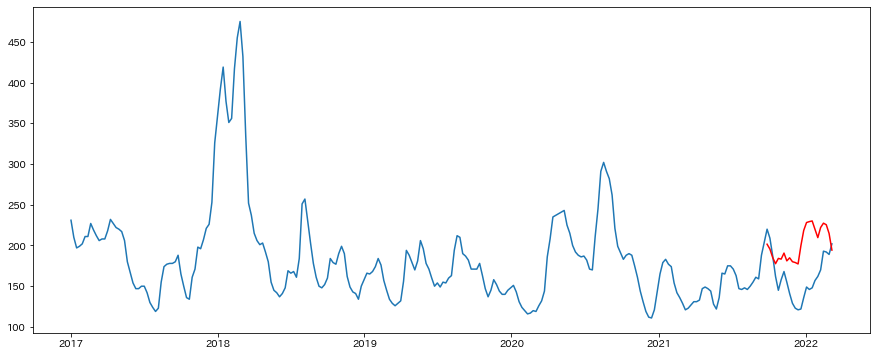

In [22]:
bestPred = result.predict('2021-09-27', '2022-03-07',exog=X_pred,freq="W-MON")
plt.plot(df["キャベツ"])
plt.plot(bestPred, "r")

In [24]:
from sklearn.metrics import mean_squared_error
mean_squared_error(test["キャベツ"],bestPred)

2489.064178805524